# Load data from extracted files
Make sure to have prepared the environment and executed `python extract_data.py`

In [1]:
import networkx as nx

from pathlib import Path

In [2]:
def load_graphs_set(root, set_name):
    set_dir = Path(f'{root}/{set_name}/')
    files = [f.name for f in set_dir.iterdir() if f.is_file()]
    graphs = [nx.read_edgelist(set_dir / f) for f in sorted(files)]
    return graphs

In [3]:
def load_all_graphs(root):
    training_graphs = load_graphs_set(root, 'training')
    testing_graphs = load_graphs_set(root, 'testing')
    return training_graphs, testing_graphs

In [4]:
root = './dataset'
training_graphs, testing_graphs = load_all_graphs(root)
len(training_graphs), len(testing_graphs)

(8042, 1363)

# Create DataFrame for information about the graphs

In [5]:
import pandas as pd

In [6]:
def graph_data(graphs):
    info = []
    for g in graphs:
        n = g.number_of_nodes()
        e = g.number_of_edges()
        info.append({
            'graph': g,
            'nodes': n,
            'edges': e,
            'density': e / (n * (n - 1) / 2)
        })
    return pd.DataFrame(info)

In [7]:
training_df = graph_data(training_graphs)
training_df

,graph,nodes,edges,density
0,"(0, 1, 2)",3,3,1.000000
1,"(0, 2, 1)",3,2,0.666667
2,"(0, 1, 2)",3,2,0.666667
3,"(0, 1, 2)",3,3,1.000000
4,"(0, 2, 1)",3,2,0.666667
...,...,...,...,...
8037,"(0, 2, 8, 7, 6, 5, 3, 1, 9, 4)",10,39,0.866667
8038,"(0, 4, 3, 1, 5, 7, 2, 9, 6, 8)",10,10,0.222222
8039,"(0, 5, 1, 8, 3, 2, 7, 6, 4, 9)",10,9,0.200000
8040,"(0, 2, 1, 8, 5, 6, 3, 4, 9, 7)",10,16,0.355556


In [8]:
training_df.groupby('nodes')['graph'].count()

nodes
3     1000
4     1000
5     1000
6     1029
7     1002
8     1002
9      998
10    1011
Name: graph, dtype: int64

In [9]:
testing_df = graph_data(testing_graphs)
testing_df

,graph,nodes,edges,density
0,"(0, 1, 2)",3,2,0.666667
1,"(0, 3, 1, 2)",4,4,0.666667
2,"(0, 2, 3, 1)",4,5,0.833333
3,"(0, 1, 2, 3)",4,3,0.500000
4,"(0, 1, 2, 3)",4,3,0.500000
...,...,...,...,...
1358,"(0, 6, 1, 3, 4, 2, 5, 9, 7, 8)",10,10,0.222222
1359,"(0, 6, 9, 7, 8, 1, 3, 5, 2, 4)",10,24,0.533333
1360,"(0, 9, 2, 4, 3, 5, 7, 6, 1, 8)",10,36,0.800000
1361,"(0, 9, 1, 2, 5, 3, 4, 7, 8, 6)",10,10,0.222222


In [10]:
testing_df.groupby('nodes')['graph'].count()

nodes
3       1
4       8
5     146
6     221
7     248
8     248
9     252
10    239
Name: graph, dtype: int64

# Visualize sample graphs

In [11]:
import random
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
def plot_random_graphs(graph_list, N, color='skyblue'):
    if N > len(graph_list):
        raise ValueError("N cannot be greater than the number of graphs in the list.")
    
    chosen_graphs = random.sample(graph_list, N)

    fig, axes = plt.subplots(1, N, figsize=(15, 5))
    if N == 1:
        axes = [axes]
    for ax, graph in zip(axes, chosen_graphs):
        nx.draw(graph, ax=ax, with_labels=True, node_color=color, node_size=1000, font_size=12)
    plt.tight_layout()
    plt.show()

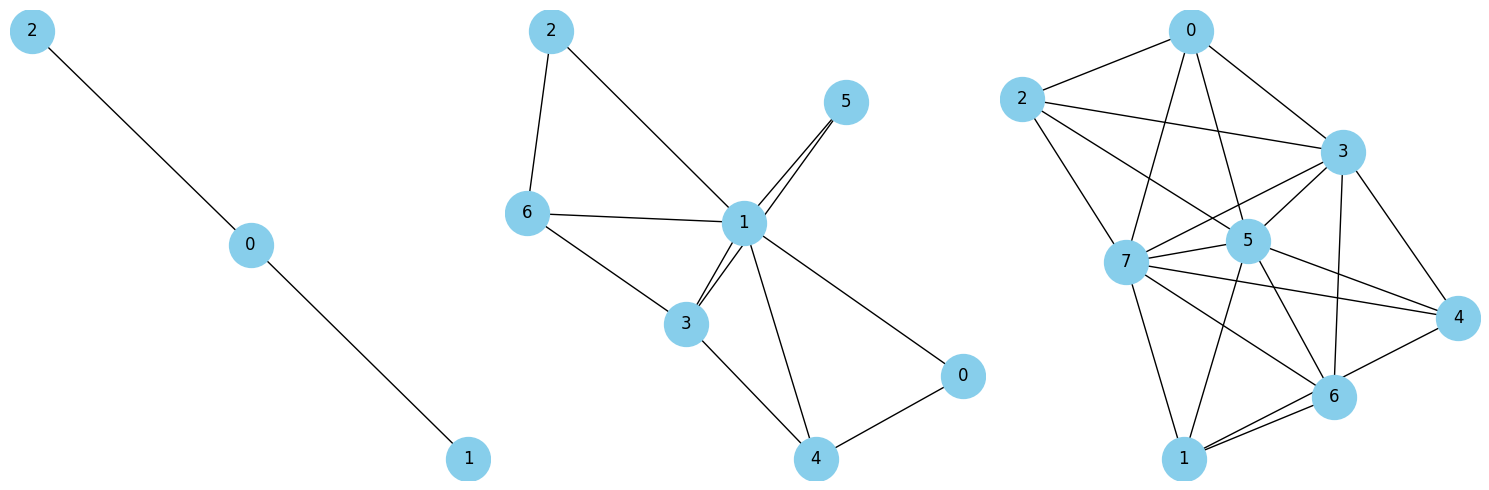

In [13]:
plot_random_graphs(training_graphs, 3)

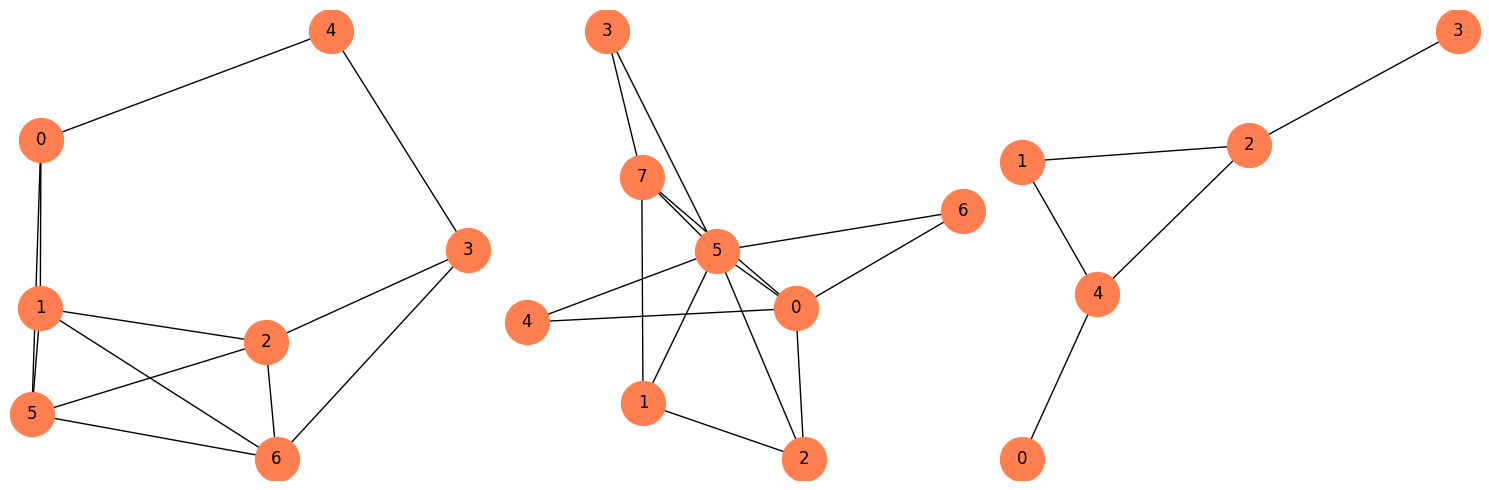

In [14]:
plot_random_graphs(testing_graphs, 3, color='coral')